In [ ]:
pip install kserve

In [2]:
from kserve import RESTConfig, InferenceRESTClient, InferRequest, InferInput
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from random import randrange
import numpy as np
import os
import json
import requests

In [ ]:
# Assuming dataset is already downloaded from the basic demo

In [7]:
# Dataset
ds_dog_breeds_path = "./dog-breeds-dataset"
test_ds_dog_breeds_path = os.path.join(ds_dog_breeds_path, "test")
ds_dog_breeds = datasets.ImageFolder(test_ds_dog_breeds_path)
dog_breeds_classes = ds_dog_breeds.find_classes(test_ds_dog_breeds_path)[0]

print(f"Classes dog_breeds_classifier: {dog_breeds_classes}")

Classes dog_breeds_classifier: ['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Ca

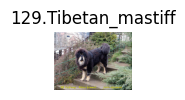

(1, 478, 640, 3)


In [143]:
# Show sample image
fig = plt.figure(figsize=(1, 1))
sample_idx = randrange(len(ds_dog_breeds))

img, label = ds_dog_breeds[sample_idx]
fig.add_subplot(1, 1, 1)

plt.title(dog_breeds_classes[label])
plt.axis("off")
plt.imshow(img)
plt.show()# Dataset
ds_dog_breeds_path = "./dog-breeds-dataset"
test_ds_dog_breeds_path = os.path.join(ds_dog_breeds_path, "test")
ds_dog_breeds = datasets.ImageFolder(test_ds_dog_breeds_path)
dog_breeds_classes = ds_dog_breeds.find_classes(test_ds_dog_breeds_path)[0]

#print(f"Classes dog_breeds_classifier: {dog_breeds_classes}")

img_array = np.array(img.convert('RGB'))

if img_array.ndim == 3:
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
#print(img_array.shape)

In [144]:
model_name = "dog-poem-pipeline" # The name of the graph
request = InferRequest(
    model_name=model_name,
    infer_inputs=[
        InferInput(
            name="data",
            shape=list(img_array.shape),
            datatype="FP32",
            data=img_array.tolist()
        )
    ],
)
#    You can get this with: oc get ig dog-poem-pipeline -o jsonpath='{.status.url}'
base_url = "https://dog-poem-pipeline-route-modelserving-demo.apps.rosa.n1t3u2f3w1s0b1d.kkw2.p3.openshiftapps.com"


In [142]:
cfg = RESTConfig(verify=False)
client = InferenceRESTClient(cfg)

infer_response = await client.infer(
    base_url,
    request,
    model_name=request.model_name,
    is_graph_endpoint=True
)

print("\n--- Final Response from Graph ---")
#print(infer_response)

poem = infer_response["choices"][0]["text"].strip()
print(poem)


--- Final Response from Graph ---
There once was a pup, oh so fine,
A Bedlington terrier, with a coat so divine.
His fur was a curly delight,
In shades of honey and cream, shining bright.
He'd chase after balls, with a joyful shout,
And dig in the dirt, without a doubt.

His ears were so floppy, his tail so long,
He'd wag it with glee, all day strong.
He'd snuggle up close, with a loving gaze,
And steal hearts away
